In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent); os.chdir(set_path)

In [2]:
from TargetDistributions.Fast_BNN import FastPosteriorBNN
import torch

# 2 Dim

changing model batch size to 10000 (note that this will be occuring often if this message comes up during training


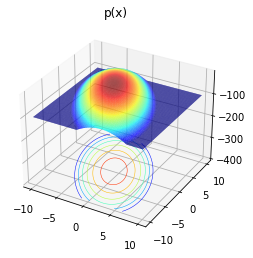

In [3]:
posterior_bnn = FastPosteriorBNN(n_datapoints=2, x_dim=1, y_dim=1, n_hidden_layers=0, layer_width=0
                             , linear_activations=False, fixed_variance=True, use_bias=True)

assert posterior_bnn.n_parameters == 2
from Utils.plotting_utils import plot_distribution
import matplotlib.pyplot as plt

plot_distribution(posterior_bnn, n_points=100)
plt.show()

changing model batch size to 10000 (note that this will be occuring often if this message comes up during training


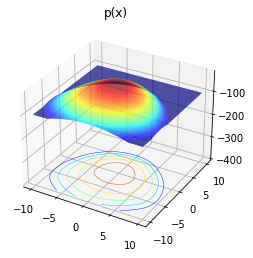

In [4]:
posterior_bnn = FastPosteriorBNN(n_datapoints=10, x_dim=1, y_dim=1, n_hidden_layers=0, layer_width=0
                             , linear_activations=False, fixed_variance=True, use_bias=True, 
                                 linear_activations_output=False)

assert posterior_bnn.n_parameters == 2
from Utils.plotting_utils import plot_distribution
import matplotlib.pyplot as plt

plot_distribution(posterior_bnn, n_points=100)
plt.show()

changing model batch size to 10000 (note that this will be occuring often if this message comes up during training


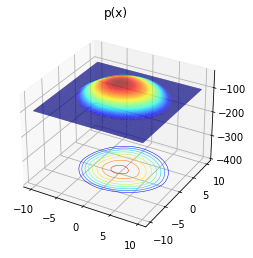

In [6]:
posterior_bnn = FastPosteriorBNN(n_datapoints=10, x_dim=1, y_dim=2, n_hidden_layers=0, layer_width=0
                             , linear_activations=False, fixed_variance=True, use_bias=False, 
                                 linear_activations_output=False)

assert posterior_bnn.n_parameters == 2
from Utils.plotting_utils import plot_distribution
import matplotlib.pyplot as plt

plot_distribution(posterior_bnn, n_points=100)
plt.show()

## Let's train a flow

# More Dim

In [ ]:
posterior_bnn = PosteriorBNN(n_datapoints=10, x_dim=2, y_dim=2, n_hidden_layers=1, layer_width=3,
                             fixed_variance=True)
print(posterior_bnn.model.n_parameters)

In [ ]:
for _ in range(5):
    samples_w = torch.randn(posterior_bnn.model.n_parameters)
    print(posterior_bnn.log_prob(samples_w))